This time, we are interviewing people to give mayor Green a grade between 0 and 10. Only 100 samples were taken.

## Objective:
* Bootstrap polling data to find confidence interval of grades
* Justify use of bootstrapping on this datase

In [8]:
# Standard imports
import math
import io

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

In [9]:
pop = pd.read_csv('grades.csv')

In [10]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


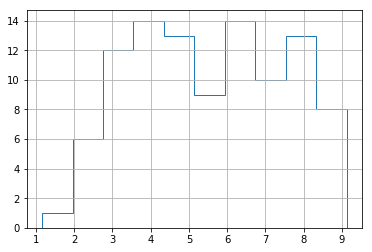

In [12]:
pop.grade.hist(histtype='step')

In [13]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


## Bootstrapping

* Introduced by Efron in 1979
* Estimate the uncertainty of our statistic (the mean) by generating a large family of samples
* Characterize distribution of the mean over this family

Each sample in the family is prepared as follows:
* Draw grades randomly for single existing sample allowing the same grade to be drawn more than once
* This is technically sampling with replacement
* Requires sample used to be representative


In [14]:
pop.sample(100, replace=True).describe()

,grade
count,100.000000
mean,5.872691
std,1.969112
min,1.160899
25%,4.204147
50%,5.959915
75%,7.605377
max,9.120705


In [21]:
bootstrap = pd.DataFrame({'meangrade': [pop.sample(100, replace=True).grade.mean() for i in range(1000)]})

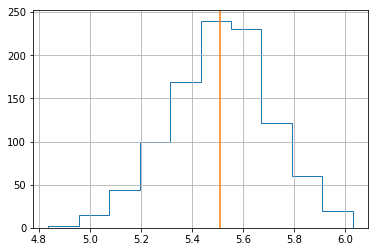

In [22]:
bootstrap.meangrade.hist(histtype='step')
# Show original mean drawn as a line
plt.axvline(pop.grade.mean(), color='C1')

In [23]:
# Extract quantiles
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.122830909764585, 5.8901142619991)

Show that the guess is acceptable by showing how the dataset was generated.
This distribution was actually a sum of 2 normal distributions with equal weights.
We can use scipy.stats to handle distributions.


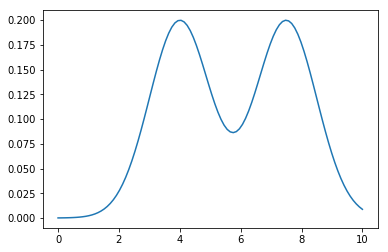

In [24]:
n1 = scipy.stats.norm(7.5, 1)
n2 = scipy.stats.norm(4, 1)

x = np.linspace(0, 10, 100)
plt.plot(x, 0.5*n1.pdf(x) + 0.5*n2.pdf(x))

In [27]:
# Function to draw a grade
def draw():
    # Continue drawing until an acceptable sample is returned
    while True:
        # Draw a unifrom distribution number between 0 and 1 
        # Then compare with 0.5
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        # Truncate
        if 0 <= v <= 10:
            return v

In [28]:
draw()

8.851666581640846

In [31]:
# Draw sample repeatedly n times
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

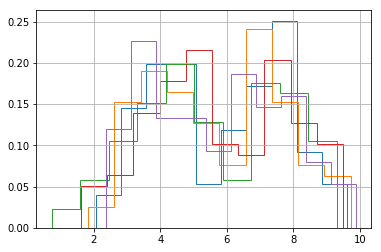

In [32]:
for i in range(5):
    dataset(100).grade.hist(histtype='step', density=True)

In [33]:
means = pd.DataFrame({'meangrade': [dataset(100).grade.mean() for i in range(1000)]})

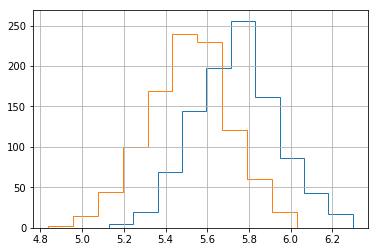

In [35]:
# Compare mean of generated data to bootstrapped means
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')

We see that the 2 are displaces and the spread is comparable. Which justifies the use of bootstrapping.